In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Select 10% for testing and 90% for training
data_len = len(diabetes.target)
nTestSamples = int(0.1 * data_len)
idx_test = np.arange(1, nTestSamples)
idx_train = np.arange(idx_test[-1] + 1, data_len - idx_test[-1])

# Extract the bmi feature
print(diabetes.feature_names[2])
X_diabetes = diabetes.data[:, np.newaxis, 2]
X_test = X_diabetes[idx_test]
X_train = X_diabetes[idx_train]
y_test = diabetes.target[idx_test]
y_train = diabetes.target[idx_train]

bmi


In [13]:
# For comparison purposes, create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print("Intercept (theta 0): \n", regr.intercept_)
print("Coefficients (theta 1): \n", regr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Intercept (theta 0): 
 153.73201108209992
Coefficients (theta 1): 
 [958.76368869]
Mean squared error: 3956.25


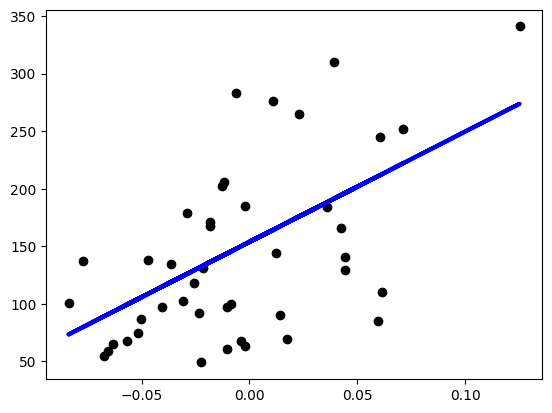

In [14]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.show()

In [15]:
# Hypothesis function
def h_lin(X, theta):
  """
  X should be a data vector, theta the parameters
  """
  return theta[0] + X * theta[1:]

In [20]:
# loss function
def loss_L2(h, y):
  """
  h is a vector of predictions by the hypothesis function, y is the target
  """
  return np.mean([(a-b)**2 for a, b in zip(h.flatten(), y)])
hypo = h_lin(X_test, [150, 958])
# print("hypothesis:", hypo)
print("loss:", loss_L2(hypo, y_test))

loss: 3920.3894415510895


In [21]:
# Calculate the gradients
def gradient_batch(theta, X, y):
  grad = [0, 0]

  h = h_lin(X, theta)
  residuals = [(a-b) for a, b in zip(h.flatten(), y)]

  grad[0] = np.mean(residuals)
  grad[1] = X[:, 0].dot(residuals) / len(y) # Calculate the mean

  return np.array(grad)

In [23]:
# Set initial theta values
theta = [100, 100]

# Set stopping criterion
loss_stop_threshold = 0.1

# Learning rate
alpha = 0.1

def batch_gd(X, y, theta, alpha, loss_stop_threshold):
  # Initial loss value
  loss = loss_L2(h_lin(X, theta), y)
  old_loss = loss + loss_stop_threshold

  # Loop through
  while (abs(old_loss - loss) > loss_stop_threshold):
    # Gradient descent update rules
    gradients = gradient_batch(theta, X, y)
    theta = theta - alpha * gradients

    # Update loss values
    old_loss = loss
    loss = loss_L2(h_lin(X, theta), y)

  print("GD stopped at loss %s, with coefficients: %s" % (loss, theta))
  return theta

theta = batch_gd(X_train, y_train, theta, alpha, loss_stop_threshold)

GD stopped at loss 4197.149392452885, with coefficients: [153.70863843 639.52517709]


In [24]:
# Train the algorithm using the training data, then test it using the test set
y_pred = h_lin(X_test, theta)

# Coefficients
print("Intercept (theta 0): \n", theta[0])
print("Coefficients (theta 1): \n", theta[1])

# Mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Intercept (theta 0): 
 153.70863842882716
Coefficients (theta 1): 
 639.5251770853939
Mean squared error: 4160.31


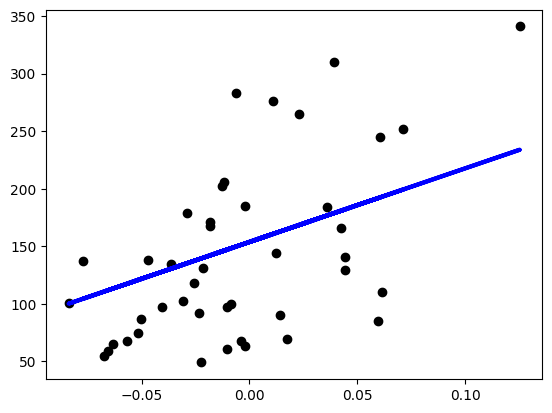

In [26]:
# Plot outputs using test data
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.show()